In [19]:
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
from shapely.geometry import Point, Polygon, MultiPolygon
import pandas as pd
import numpy as np
import networkx as nx
from networkx.readwrite import json_graph
import json
import matplotlib.pyplot as plt
import json
import pickle
from matplotlib.collections import PolyCollection
import matplotlib as mpl

### Reading the ShapeFile containing zonal information of the region

In [20]:
# Open the shapefile of flood zones
shapefile_path = './FLD_HAZ/S_FLD_HAZ_AR.shp'
gdf = gpd.read_file(shapefile_path)
gdf.to_file('myshpfile.geojson', driver='GeoJSON')

In [21]:
gdf['FLD_ZONE'].unique()

array(['A', 'AE', 'AO', 'AREA NOT INCLUDED', 'VE', 'X'], dtype=object)

In [22]:
#extrcating different zones of the region
gdf_A=gdf[gdf['FLD_ZONE']=='A']
gdf_AE=gdf[gdf['FLD_ZONE']=='AE']
gdf_AO=gdf[gdf['FLD_ZONE']=='AO']
gdf_ANI=gdf[gdf['FLD_ZONE']=='AREA NOT INCLUDED']
gdf_VE=gdf[gdf['FLD_ZONE']=='VE']
gdf_X=gdf[gdf['FLD_ZONE']=='X']

In [23]:
#integrating zones of each category into seperate multipolygons
from shapely.ops import unary_union
poly_A=unary_union(gdf_A['geometry'])
poly_AO=unary_union(gdf_AO['geometry'])
poly_AE=unary_union(gdf_AE['geometry'])
poly_ANI=unary_union(gdf_ANI['geometry'])
poly_VE=unary_union(gdf_VE['geometry'])
poly_X=unary_union(gdf_X['geometry'])

#### CRS information of the Dataset

In [24]:
gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

### Visualising the whole region from Shapefile

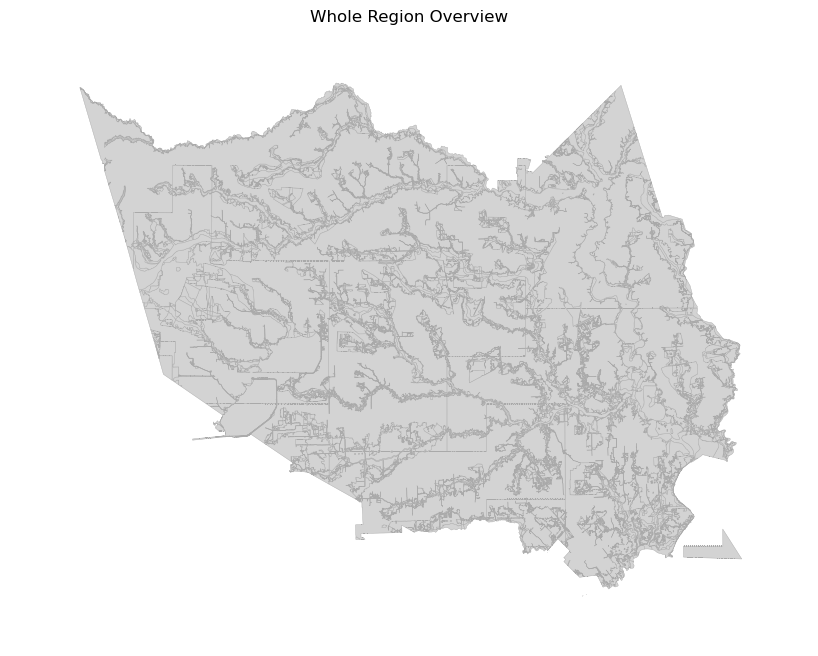

In [25]:
#plotting the whole region
geoplot.polyplot(gdf, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))
plt.title("Whole Region Overview")
plt.savefig('figures/whole_region_overview.png')

### Visualizing Seperate zones of the Region

<Figure size 1200x800 with 0 Axes>

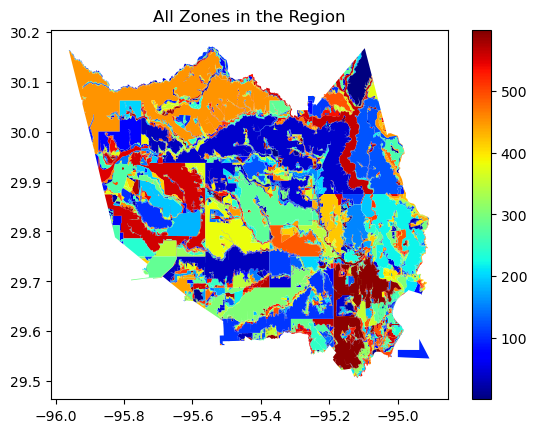

In [26]:
vert=[]
mul_poly_obj= MultiPolygon()
for i in range(len(gdf['geometry'])):
    if(type(gdf.iloc[i]['geometry']) == type(mul_poly_obj)):
        for j in gdf.iloc[i]['geometry'].geoms:
            vert.append(list(j.exterior.coords))
        continue
    vert.append(list(gdf.iloc[i]['geometry'].exterior.coords))
#z for colour scaling
z = np.random.random(len(vert)) * 600
plt.figure(figsize=(12,8)) 
fig, ax = plt.subplots()


# Make the collection and add it to the plot.
coll = PolyCollection(vert, array=z, cmap=mpl.cm.jet, edgecolors='none')
ax.add_collection(coll)
ax.autoscale_view()

# Add a colorbar for the PolyCollection
fig.colorbar(coll, ax=ax)

plt.title("All Zones in the Region")
plt.savefig('figures/sep_zones.png')
plt.show()

In [27]:
for i in gdf['FLD_ZONE'].unique():
    print(i,"->",gdf[gdf['FLD_ZONE']==i].shape[0])

A -> 133
AE -> 4018
AO -> 30
AREA NOT INCLUDED -> 4
VE -> 150
X -> 6312


Visualizing Zones of Each Category

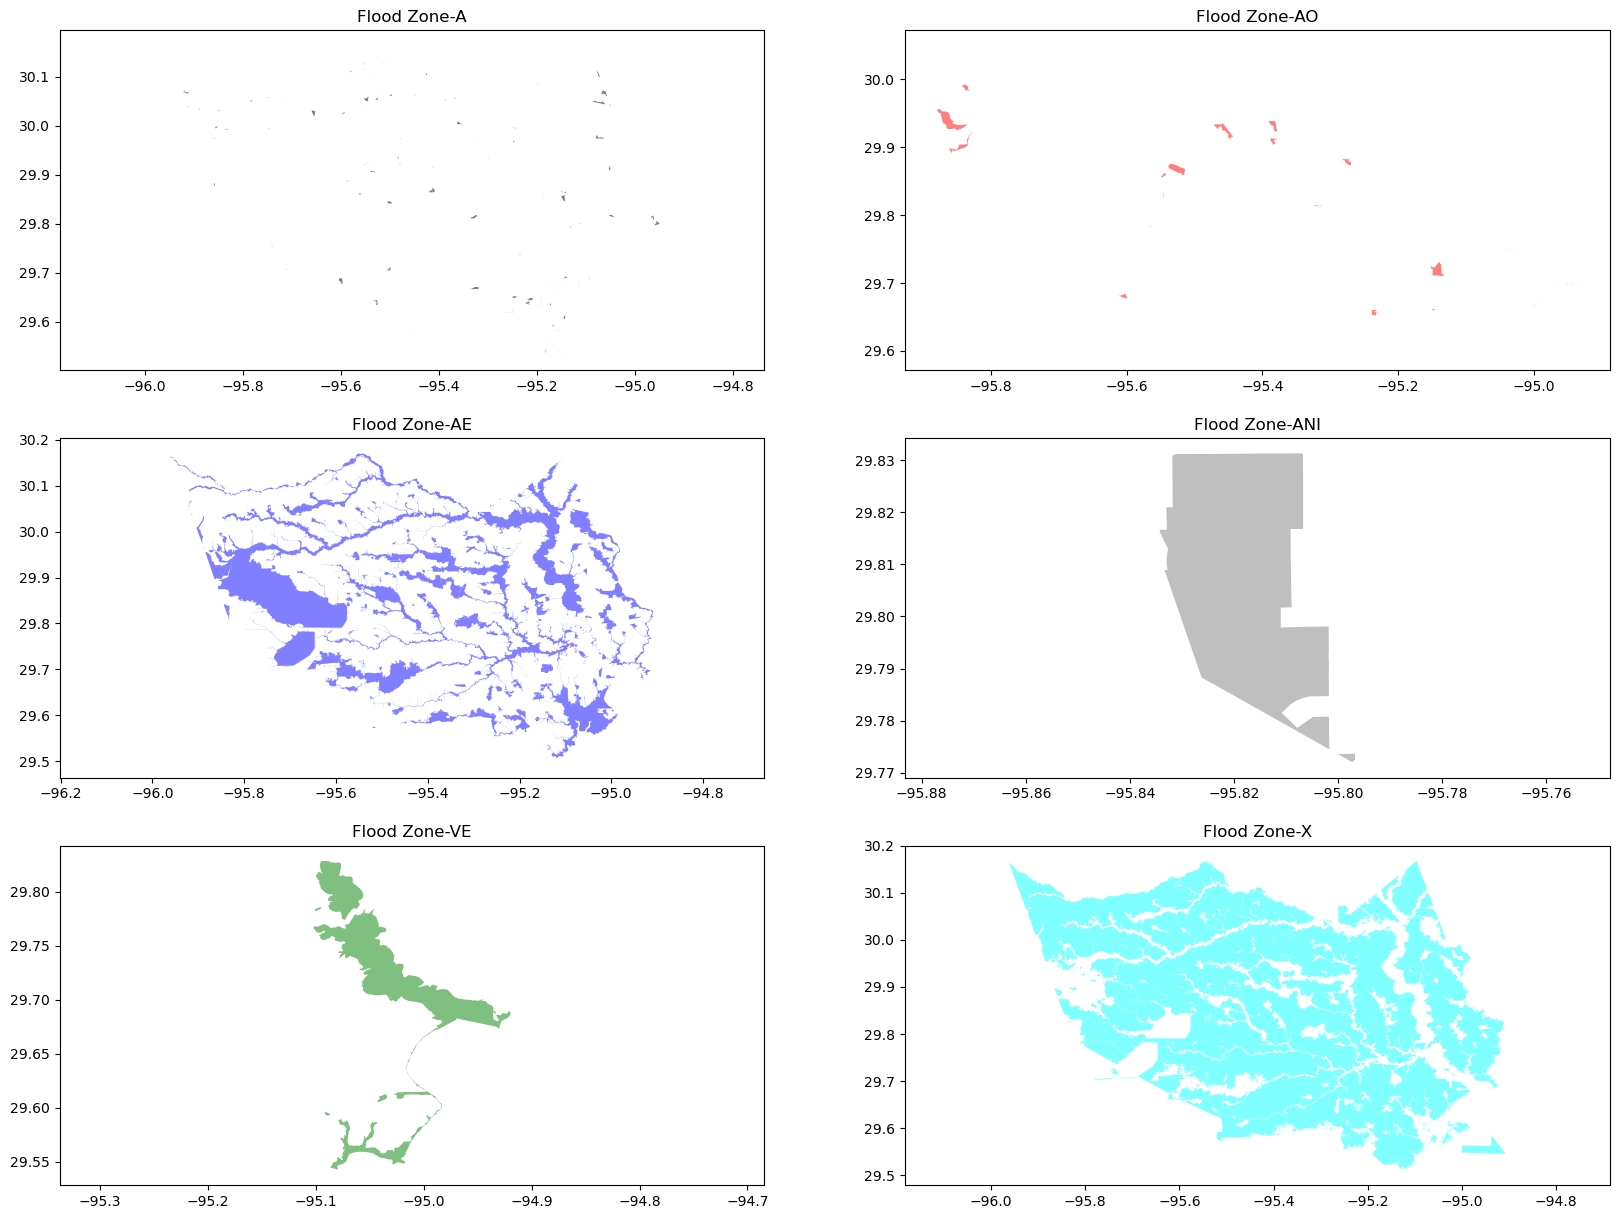

In [28]:
import shapely.ops as so

pol_list=[poly_A,poly_AO,poly_AE,poly_ANI,poly_VE,poly_X]
pol_name=['Flood Zone-A','Flood Zone-AO','Flood Zone-AE','Flood Zone-ANI','Flood Zone-VE','Flood Zone-X']
col=['black','red','blue','grey','green','cyan']

fig, axs = plt.subplots(3,2,figsize=(20,15))

for i in range(6):
    for geom in pol_list[i].geoms:
        xs, ys = geom.exterior.xy
        axs[i//2,i%2].set_title(pol_name[i])
        axs[i//2,i%2].set_aspect('equal', 'datalim')
        axs[i//2,i%2].fill(xs, ys, alpha=0.5, fc=col[i], ec='none')

plt.savefig('figures/FloodZones.png')
plt.show()

###

### Visualizing Seperate zones of each category

<Figure size 1200x800 with 0 Axes>

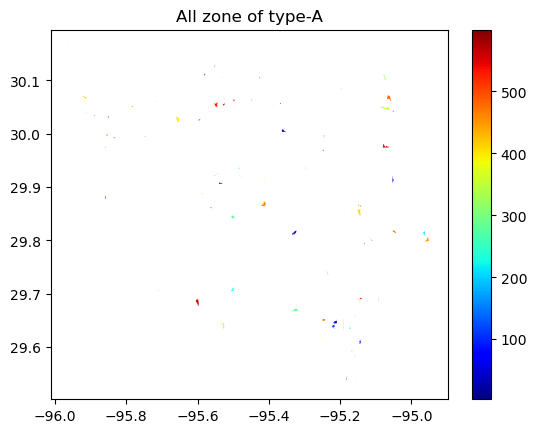

In [29]:
# Type-A flood zones
vert=[]
mul_poly_obj= MultiPolygon()
for i in range(len(gdf_A['geometry'])):
    if(type(gdf_A.iloc[i]['geometry']) == type(mul_poly_obj)):
        for j in gdf_A.iloc[i]['geometry'].geoms:
            vert.append(list(j.exterior.coords))
        continue
    vert.append(list(gdf_A.iloc[i]['geometry'].exterior.coords))
#z for colour scaling
z = np.random.random(len(vert)) * 600
plt.figure(figsize=(12, 8)) 
fig, ax = plt.subplots()


# Make the collection and add it to the plot.
coll = PolyCollection(vert, array=z, cmap=mpl.cm.jet, edgecolors='none')
ax.add_collection(coll)
ax.autoscale_view()

# Add a colorbar for the PolyCollection
fig.colorbar(coll, ax=ax)

plt.title("All zone of type-A")
plt.savefig('figures/FloodZones_A.png')
plt.show()

<Figure size 1200x800 with 0 Axes>

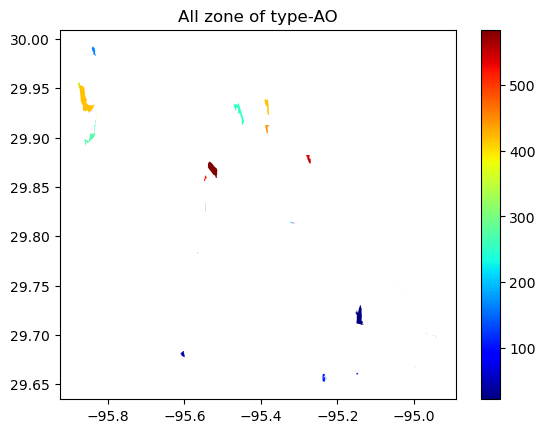

In [30]:
# Type-A flood zones
vert=[]
mul_poly_obj= MultiPolygon()
for i in range(len(gdf_AO['geometry'])):
    if(type(gdf_AO.iloc[i]['geometry']) == type(mul_poly_obj)):
        for j in gdf_AO.iloc[i]['geometry'].geoms:
            vert.append(list(j.exterior.coords))
        continue
    vert.append(list(gdf_AO.iloc[i]['geometry'].exterior.coords))
#z for colour scaling
z = np.random.random(len(vert)) * 600
plt.figure(figsize=(12, 8)) 
fig, ax = plt.subplots()


# Make the collection and add it to the plot.
coll = PolyCollection(vert, array=z, cmap=mpl.cm.jet, edgecolors='none')
ax.add_collection(coll)
ax.autoscale_view()

# Add a colorbar for the PolyCollection
fig.colorbar(coll, ax=ax)

plt.title("All zone of type-AO")
plt.savefig('figures/FloodZones_AO.png')
plt.show()

<Figure size 1200x800 with 0 Axes>

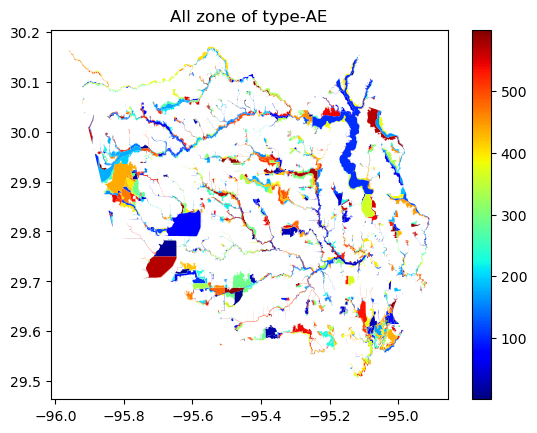

In [31]:
# Type-A flood zones
vert=[]
mul_poly_obj= MultiPolygon()
for i in range(len(gdf_AE['geometry'])):
    if(type(gdf_AE.iloc[i]['geometry']) == type(mul_poly_obj)):
        for j in gdf_AE.iloc[i]['geometry'].geoms:
            vert.append(list(j.exterior.coords))
        continue
    vert.append(list(gdf_AE.iloc[i]['geometry'].exterior.coords))
#z for colour scaling
z = np.random.random(len(vert)) * 600
plt.figure(figsize=(12, 8)) 
fig, ax = plt.subplots()


# Make the collection and add it to the plot.
coll = PolyCollection(vert, array=z, cmap=mpl.cm.jet, edgecolors='none')
ax.add_collection(coll)
ax.autoscale_view()

# Add a colorbar for the PolyCollection
fig.colorbar(coll, ax=ax)

plt.title("All zone of type-AE")
plt.savefig('figures/FloodZones_AE.png')
plt.show()

<Figure size 1200x800 with 0 Axes>

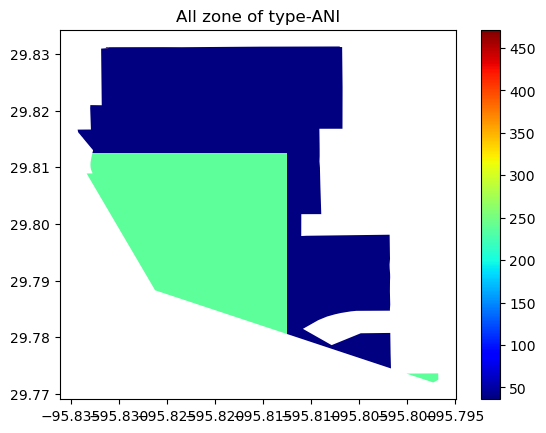

In [32]:
# Type-A flood zones
vert=[]
mul_poly_obj= MultiPolygon()
for i in range(len(gdf_ANI['geometry'])):
    if(type(gdf_ANI.iloc[i]['geometry']) == type(mul_poly_obj)):
        for j in gdf_ANI.iloc[i]['geometry'].geoms:
            vert.append(list(j.exterior.coords))
        continue
    vert.append(list(gdf_ANI.iloc[i]['geometry'].exterior.coords))
#z for colour scaling
z = np.random.random(len(vert)) * 600
plt.figure(figsize=(12, 8)) 
fig, ax = plt.subplots()


# Make the collection and add it to the plot.
coll = PolyCollection(vert, array=z, cmap=mpl.cm.jet, edgecolors='none')
ax.add_collection(coll)
ax.autoscale_view()

# Add a colorbar for the PolyCollection
fig.colorbar(coll, ax=ax)

plt.title("All zone of type-ANI")
plt.savefig('figures/FloodZones_ANI.png')
plt.show()

<Figure size 2000x800 with 0 Axes>

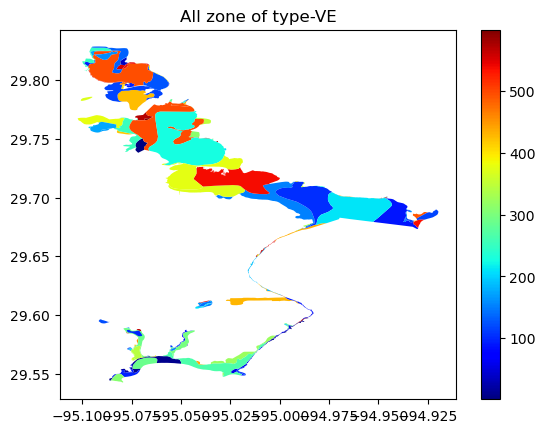

In [33]:
# Type-A flood zones
vert=[]
mul_poly_obj= MultiPolygon()
for i in range(len(gdf_VE['geometry'])):
    if(type(gdf_VE.iloc[i]['geometry']) == type(mul_poly_obj)):
        for j in gdf_VE.iloc[i]['geometry'].geoms:
            vert.append(list(j.exterior.coords))
        continue
    vert.append(list(gdf_VE.iloc[i]['geometry'].exterior.coords))
#z for colour scaling
z = np.random.random(len(vert)) * 600
plt.figure(figsize=(20, 8)) 
fig, ax = plt.subplots()


# Make the collection and add it to the plot.
coll = PolyCollection(vert, array=z, cmap=mpl.cm.jet, edgecolors='none')
ax.add_collection(coll)
ax.autoscale_view()

# Add a colorbar for the PolyCollection
fig.colorbar(coll, ax=ax)

plt.title("All zone of type-VE")
plt.savefig('figures/FloodZones_VE.png')
plt.show()

<Figure size 1200x800 with 0 Axes>

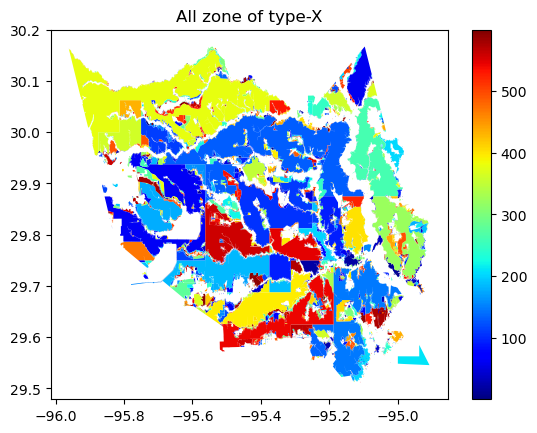

In [34]:
# Type-A flood zones
vert=[]
mul_poly_obj= MultiPolygon()
for i in range(len(gdf_X['geometry'])):
    if(type(gdf_X.iloc[i]['geometry']) == type(mul_poly_obj)):
        for j in gdf_X.iloc[i]['geometry'].geoms:
            vert.append(list(j.exterior.coords))
        continue
    vert.append(list(gdf_X.iloc[i]['geometry'].exterior.coords))
#z for colour scaling
z = np.random.random(len(vert)) * 600
plt.figure(figsize=(12, 8)) 
fig, ax = plt.subplots()


# Make the collection and add it to the plot.
coll = PolyCollection(vert, array=z, cmap=mpl.cm.jet, edgecolors='none')
ax.add_collection(coll)
ax.autoscale_view()

# Add a colorbar for the PolyCollection
fig.colorbar(coll, ax=ax)

plt.title("All zone of type-X")
plt.savefig('figures/FloodZones_X.png')
plt.show()

### Reading Houston Road Network Data

In [35]:
#reading the road network file
with open('./houston_latlon.json', 'r') as f:
          data = json.load(f)
road_nodes = pd.json_normalize(data,record_path =['nodes'])
pickle.dump(road_nodes, open('road_nodes.pkl', 'wb'))
road_nodes.head(3)

,pos,id
0,"[29.3527864, -95.8874754]",224191350
1,"[29.3528607, -95.8875656]",224191354
2,"[29.353346, -95.886863]",224372803


### Visualizing the roadnetwork Data

In [37]:
rd_nds=np.array([(float(x[1]),float(x[0])) for x in road_nodes['pos']])
rd_nds

array([[-95.8874754,  29.3527864],
       [-95.8875656,  29.3528607],
       [-95.886863 ,  29.353346 ],
       ...,
       [-95.1825515,  29.6386313],
       [-95.1892554,  29.6395583],
       [-95.1873815,  29.640259 ]])

In [38]:
#extracting lattitudes and longitudes
lon=rd_nds.T[0]
lat=rd_nds.T[1]

In [39]:
# Create points geodataframe from numpy arrays
nodes_df = pd.DataFrame({'lon':lon, 'lat':lat})
nodes_df['coords'] = list(zip(nodes_df['lon'],nodes_df['lat']))
nodes_df['coords'] = nodes_df['coords'].apply(Point)
points = gpd.GeoDataFrame(nodes_df, geometry='coords', crs="EPSG:4269")

In [40]:
poly_list=[poly_A,poly_AO,poly_AE,poly_ANI,poly_VE,poly_X]
poly_names=["poly_A","poly_AO","poly_AE","poly_ANI","poly_VE","poly_X"]

In [41]:
# Create geodataframe from numpy arrays
pol_zones = pd.DataFrame()
pol_zones['coords'] = poly_list
pol_zones['names'] = poly_names
slice = gpd.GeoDataFrame(pol_zones, geometry='coords',crs="EPSG:4269")

### Classifying the Nodes into their Respective FloodZones

In [42]:
# Perform spatial join to match points and polygons
pointInPolys = gpd.tools.sjoin(points, slice, predicate="within", how='left')

In [43]:
#pol_name=["poly_A","poly_AO","poly_AE","poly_ANI","poly_VE","poly_X"]
A_nodes=points[pointInPolys.names=='poly_A']
AO_nodes=points[pointInPolys.names=='poly_AO']
AE_nodes=points[pointInPolys.names=='poly_AE']
ANI_nodes=points[pointInPolys.names=='poly_ANI']
VE_nodes=points[pointInPolys.names=='poly_VE']
X_nodes=points[pointInPolys.names=='poly_X']

### Saving the classified Nodes into Pickle files

In [44]:
pickle.dump(A_nodes, open('A_nodes.pkl', 'wb'))
pickle.dump(AO_nodes, open('AO_nodes.pkl', 'wb'))
pickle.dump(AE_nodes, open('AE_nodes.pkl', 'wb'))
pickle.dump(ANI_nodes, open('ANI_nodes.pkl', 'wb'))
pickle.dump(VE_nodes, open('VE_nodes.pkl', 'wb'))
pickle.dump(X_nodes, open('X_nodes.pkl', 'wb'))

### Visualizing the Nodes in each Flood Zone

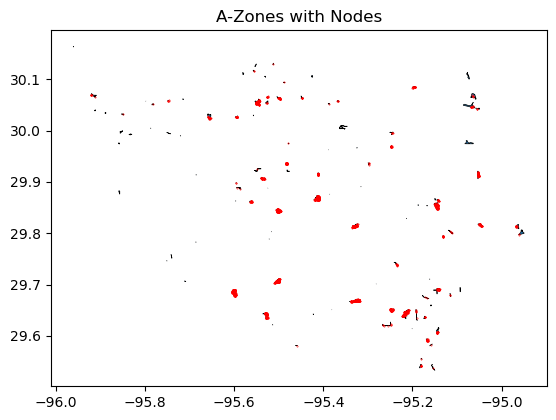

<Figure size 1200x800 with 0 Axes>

In [60]:
base = gdf_A.geometry.plot(linewidth=0.5, edgecolor="black")
A_nodes.plot(ax=base, linewidth=1, color="red", markersize=0.1)
plt.title("A-Zones with Nodes")
plt.savefig('figures/A_Zone_nodes.png')
plt.figure(figsize=(12,8))
plt.show()

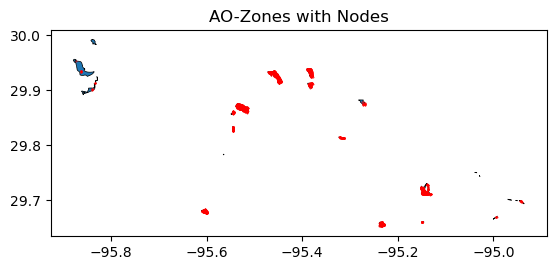

<Figure size 1200x800 with 0 Axes>

In [61]:
base = gdf_AO.geometry.plot(linewidth=0.5, edgecolor="black")
AO_nodes.plot(ax=base, linewidth=1, color="red", markersize=0.1)
plt.title("AO-Zones with Nodes")
plt.savefig('figures/AO_Zone_nodes.png')
plt.figure(figsize=(12,8))
plt.show()

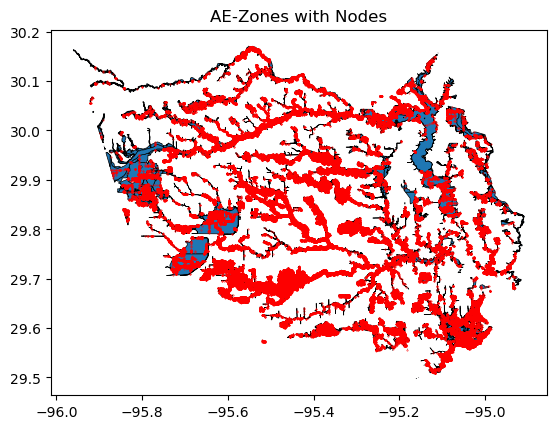

<Figure size 1200x800 with 0 Axes>

In [62]:
base = gdf_AE.geometry.plot(linewidth=0.5, edgecolor="black")
AE_nodes.plot(ax=base, linewidth=1, color="red", markersize=0.1)
plt.title("AE-Zones with Nodes")
plt.savefig('figures/AE_Zone_nodes.png')
plt.figure(figsize=(12,8))
plt.show()

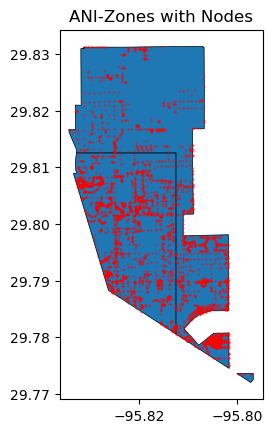

<Figure size 1200x800 with 0 Axes>

In [63]:
base = gdf_ANI.geometry.plot(linewidth=0.5, edgecolor="black")
ANI_nodes.plot(ax=base, linewidth=1, color="red", markersize=0.1)
plt.title("ANI-Zones with Nodes")
plt.savefig('figures/ANI_Zone_nodes.png')
plt.figure(figsize=(12,8))
plt.show()

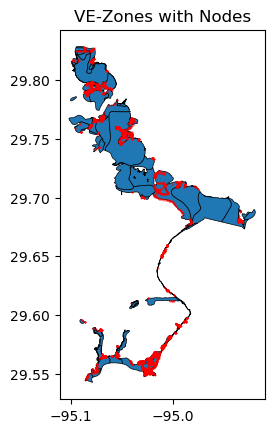

<Figure size 1200x800 with 0 Axes>

In [64]:
base = gdf_VE.geometry.plot(linewidth=0.5, edgecolor="black")
VE_nodes.plot(ax=base, linewidth=1, color="red", markersize=0.1)
plt.title("VE-Zones with Nodes")
plt.savefig('figures/VE_Zone_nodes.png')
plt.figure(figsize=(12,8))
plt.show()

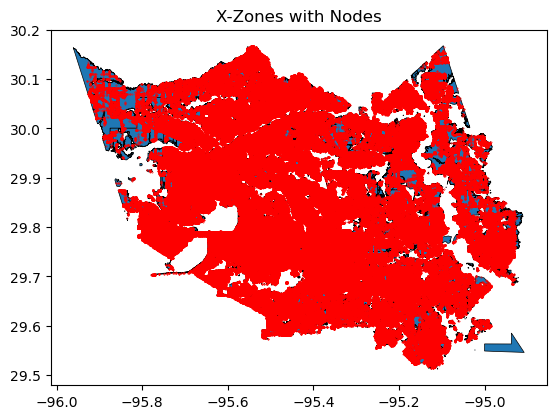

<Figure size 1200x800 with 0 Axes>

In [65]:
base = gdf_X.geometry.plot(linewidth=0.5, edgecolor="black")
X_nodes.plot(ax=base, linewidth=1, color="red", markersize=0.1)
plt.title("X-Zones with Nodes")
plt.savefig('figures/X_Zone_nodes.png')
plt.figure(figsize=(12,8))
plt.show()